## Exploring the Top Crime and Safety index Countries in the world
 ##

***

Top 10 Countries by Crime and Safety Indexes, 2022


***




#### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the World crime Index dataset!

In [119]:
import pandas as pd
import numpy as np
#import statsmodels.formula.api as sm
#from matplotlib import pyplot as plt

#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

################

crime = pd.read_csv("World Crime Index .csv")
crime.head()

,Rank,City,Crime Index,Safety Index
0,1,"Caracas, Venezuela",83.98,16.02
1,2,"Pretoria, South Africa",81.98,18.02
2,3,"Celaya, Mexico",81.80,18.20
3,4,"San Pedro Sula, Honduras",80.87,19.13
4,5,"Port Moresby, Papua New Guinea",80.71,19.29


In [120]:
crime.tail()

,Rank,City,Crime Index,Safety Index
448,449,"Quebec City, Canada",15.14,84.86
449,450,"Taipei, Taiwan",15.05,84.95
450,451,"San Sebastian, Spain",14.86,85.14
451,452,"Doha, Qatar",13.96,86.04
452,453,"Abu Dhabi, United Arab Emirates",11.67,88.33


### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [121]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          453 non-null    int64  
 1   City          453 non-null    object 
 2   Crime Index   453 non-null    float64
 3   Safety Index  453 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.3+ KB


In [122]:

Country = crime['City']
Country = Country.str.split(',',expand = True)
    
Country.head()

,0,1,2
0,Caracas,Venezuela,None
1,Pretoria,South Africa,None
2,Celaya,Mexico,None
3,San Pedro Sula,Honduras,None
4,Port Moresby,Papua New Guinea,None


In [123]:

crime['City'] = Country[0]
crime['Country'] = Country[2]
crime = crime[['Rank', 'City', 'Country','Crime Index','Safety Index']]
crime.head()

,Rank,City,Country,Crime Index,Safety Index
0,1,Caracas,None,83.98,16.02
1,2,Pretoria,None,81.98,18.02
2,3,Celaya,None,81.80,18.20
3,4,San Pedro Sula,None,80.87,19.13
4,5,Port Moresby,None,80.71,19.29


In [124]:
# Separate city and country for later country aggregations
Country = crime['City']
Country = Country.str.split(',', expand = True)
Country.head()

,0
0,Caracas
1,Pretoria
2,Celaya
3,San Pedro Sula
4,Port Moresby


### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [125]:
df.isnull().sum()

Rank            0
City            0
Crime Index     0
Safety Index    0
dtype: int64

In [68]:
# fill all of the 'none' values in Country [2] with their values from country[1]
#Country[2] = Country[2].fillna(Country[1])
#Country.head()

In [126]:
# 


df.head()

,Rank,City,Crime Index,Safety Index
0,1,"Caracas, Venezuela",83.98,16.02
1,2,"Pretoria, South Africa",81.98,18.02
2,3,"Celaya, Mexico",81.80,18.20
3,4,"San Pedro Sula, Honduras",80.87,19.13
4,5,"Port Moresby, Papua New Guinea",80.71,19.29


In [132]:
### select the country (and use it as the index), crime index, and safety index
countryindex = crime[['Country', 'Crime Index','Safety Index']]
countryindex = countryindex.groupby('Country').mean()
print ("Number of Countries :", countryindex.shape[1])
countryindex.head()

Number of Countries : 2


,Crime Index,Safety Index
Country,,
Canada,53.370000,46.630000
United States,51.306897,48.693103


In [90]:
## create a dataframe of the top 10 countries with the highest crime index
top10crime = countryindex.sort_values(by = ['Crime Index'], ascending = False) 
top10crime = top10crime.head(10)

top10safe =countryindex.sort_values(by =['Safety Index'], ascending = False)
top10safe = top10safe.head(10)

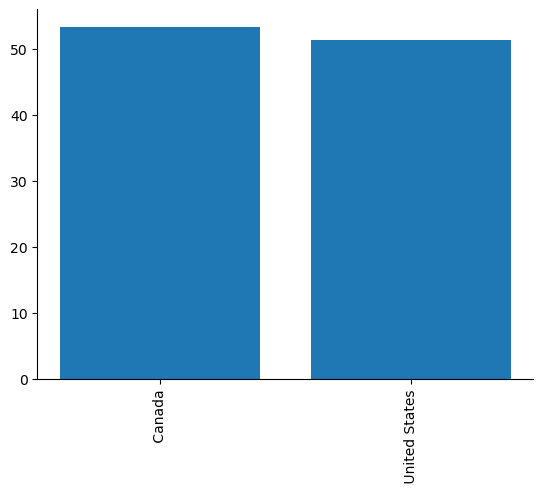

In [91]:
## top 10 highest crime index countries
plt.bar(top10crime.index, top10crime['Crime Index'])
plt.xticks(rotation=90)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

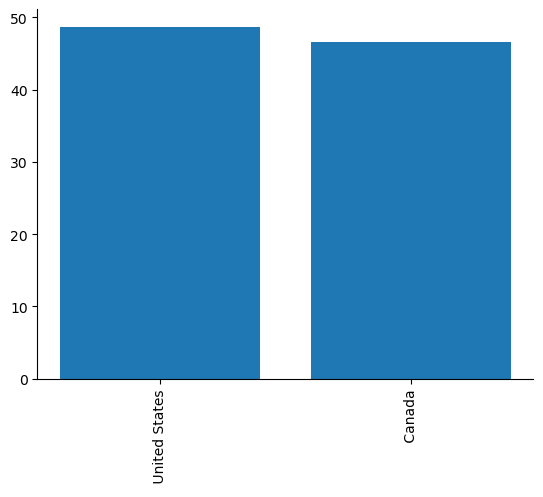

In [92]:
### top 10 highest safety index countries
plt.bar(top10safe.index, top10safe['Safety Index'])
### rotate country names by 90 degrees on the bottom axis
plt.xticks(rotation=90)
### remove the right and upper axis lines to clean the plot up
sns.despine(top=True, right=True, left=False, bottom=False)
### show the plot
plt.show()


### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [150]:
df.describe()

,Rank,Crime Index,Safety Index
count,453.000000,453.000000,453.000000
mean,227.000000,44.898212,55.101788
std,130.914094,15.506987,15.506987
min,1.000000,11.670000,16.020000
25%,114.000000,33.060000,44.900000
50%,227.000000,44.870000,55.130000
75%,340.000000,55.100000,66.940000
max,453.000000,83.980000,88.330000


In [109]:
df.mode()

,Rank,City,Crime Index,Safety Index
0,1,"Aalborg, Denmark",37.25,62.75
1,2,"Aberdeen, United Kingdom",NaN,NaN
2,3,"Abu Dhabi, United Arab Emirates",NaN,NaN
3,4,"Accra, Ghana",NaN,NaN
4,5,"Ad Dammam, Saudi Arabia",NaN,NaN
...,...,...,...,...
448,449,"Wroclaw, Poland",NaN,NaN
449,450,"Yekaterinburg, Russia",NaN,NaN
450,451,"Yerevan, Armenia",NaN,NaN
451,452,"Zagreb, Croatia",NaN,NaN


In [114]:
pd.crosstab(df["City"], df["Crime Index"], margins = True)



Crime Index,11.67,13.96,14.86,15.05,15.14,15.64,15.69,16.3,17.26,17.94,...,77.93,79.39,80.55,80.6,80.71,80.87,81.8,81.98,83.98,All
City,,,,,,,,,,,,,,,,,,,,,
"Aalborg, Denmark",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Aberdeen, United Kingdom",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Abu Dhabi, United Arab Emirates",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Accra, Ghana",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Ad Dammam, Saudi Arabia",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yekaterinburg, Russia",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Yerevan, Armenia",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Zagreb, Croatia",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [134]:
df["Safety Index"].groupby(df["City"]).mean()



City
Aalborg, Denmark                   74.46
Aberdeen, United Kingdom           66.32
Abu Dhabi, United Arab Emirates    88.33
Accra, Ghana                       53.12
Ad Dammam, Saudi Arabia            69.71
                                   ...  
Wroclaw, Poland                    69.13
Yekaterinburg, Russia              52.87
Yerevan, Armenia                   78.34
Zagreb, Croatia                    78.64
Zurich, Switzerland                82.74
Name: Safety Index, Length: 453, dtype: float64

In [138]:
df["Crime Index"].groupby(df["City"]).mean()



City
Aalborg, Denmark                   25.54
Aberdeen, United Kingdom           33.68
Abu Dhabi, United Arab Emirates    11.67
Accra, Ghana                       46.88
Ad Dammam, Saudi Arabia            30.29
                                   ...  
Wroclaw, Poland                    30.87
Yekaterinburg, Russia              47.13
Yerevan, Armenia                   21.66
Zagreb, Croatia                    21.36
Zurich, Switzerland                17.26
Name: Crime Index, Length: 453, dtype: float64

In [116]:
df["Crime Index"].groupby(df["Safety Index"]).mean()

# fare
# how does the average fare the passenger paid differ based on survival group?

Safety Index
16.02    83.98
18.02    81.98
18.20    81.80
19.13    80.87
19.29    80.71
         ...  
84.86    15.14
84.95    15.05
85.14    14.86
86.04    13.96
88.33    11.67
Name: Crime Index, Length: 439, dtype: float64

### Visualize your Results



In [ ]:
## survival by passenger class

sns.countplot(data = df, x = "City", y = "Crime Index")
plt.title('Security index')

C:\Users\Agregado Adjunto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

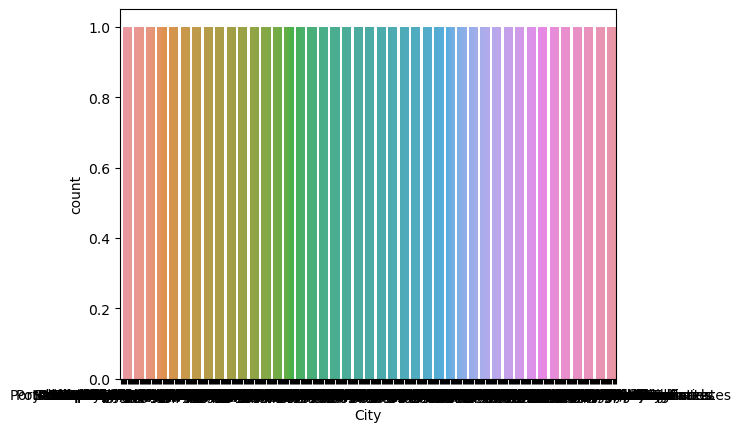

In [148]:
# number of customers by city
sns.countplot(df['City'])

<AxesSubplot:xlabel='Crime Index', ylabel='Density'>

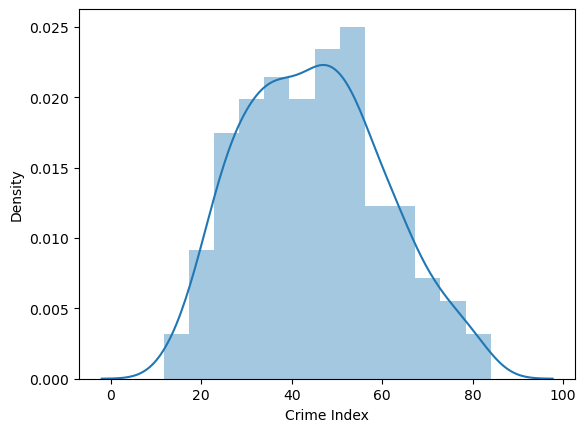

In [157]:


# distribution of Crime index
sns.distplot(crime['Crime Index'])

C:\Users\Agregado Adjunto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Safety Index', ylabel='Density'>

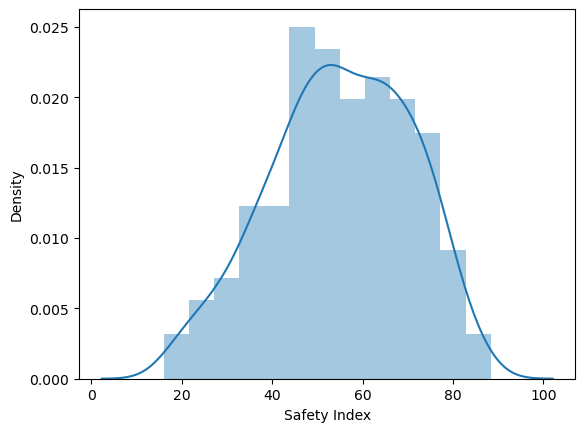

In [158]:
# distribution of Safety Index
sns.distplot(crime['Safety Index'])

<AxesSubplot:xlabel='Rank', ylabel='Density'>

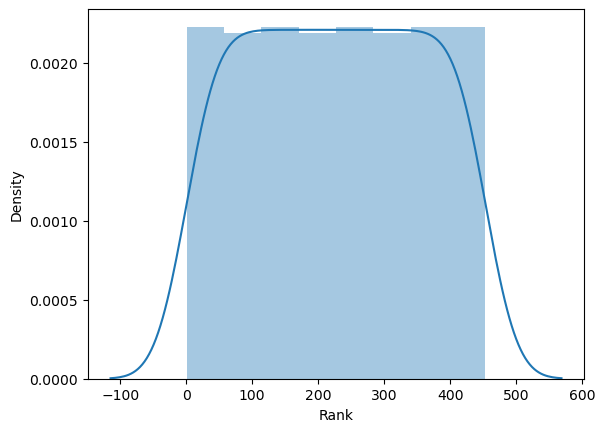

In [160]:
# distribution of Safety Index
sns.distplot(crime['Rank'])

In [162]:
# mean average spending by Crime index
pd.pivot_table(data=df, index='City', values='Crime Index')

,Crime Index
City,
"Aalborg, Denmark",25.54
"Aberdeen, United Kingdom",33.68
"Abu Dhabi, United Arab Emirates",11.67
"Accra, Ghana",46.88
"Ad Dammam, Saudi Arabia",30.29
...,...
"Wroclaw, Poland",30.87
"Yekaterinburg, Russia",47.13
"Yerevan, Armenia",21.66


In [163]:
# mean average spending by Safety index
pd.pivot_table(data=df, index='City', values='Safety Index')

,Safety Index
City,
"Aalborg, Denmark",74.46
"Aberdeen, United Kingdom",66.32
"Abu Dhabi, United Arab Emirates",88.33
"Accra, Ghana",53.12
"Ad Dammam, Saudi Arabia",69.71
...,...
"Wroclaw, Poland",69.13
"Yekaterinburg, Russia",52.87
"Yerevan, Armenia",78.34
